In [47]:
import torch
import numpy as np
from torchvision import transforms, utils
import PIL
from PIL import Image
from io import BytesIO
from torchvision.transforms import ToTensor, Resize, Normalize
import IPython.display

In [48]:
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

def unnorm_func(tensor, mean, std):
#     print(tensor.size())
    mean = torch.tensor(mean)[:,None,None]
    std = torch.tensor(std)[:,None,None]
    print(tensor.size(), mean.size(), std.size())
    return tensor * std + mean

In [52]:
def show_torch_image(a):
    a = a.permute((1, 2, 0))
    
    a_np = a.cpu().detach().numpy()
    
    showarray(a_np)

def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

In [45]:
img_path = "/home/paarth/TIMM/cat_reprogram.jpeg"
image = Image.open(img_path)
transform=transforms.Compose([
                              Resize((384, 384)),
                              ToTensor(),
                            Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
])

image = transform(image) # unsqueeze to add artificial first dimension
image = torch.tensor(image, requires_grad=False)

In [49]:
unnorm_image = unnorm_func(image, [0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
print(unnorm_image.min(), unnorm_image.max())
    

torch.Size([3, 384, 384]) torch.Size([3, 1, 1]) torch.Size([3, 1, 1])
tensor(0.0039) tensor(0.9922)


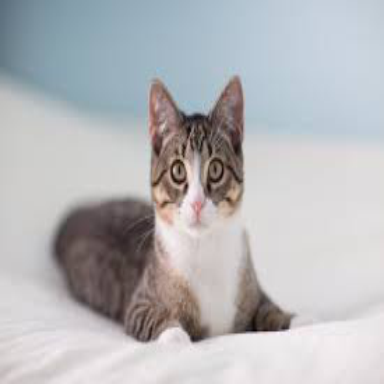

In [53]:
show_torch_image(unnorm_image*255.0)

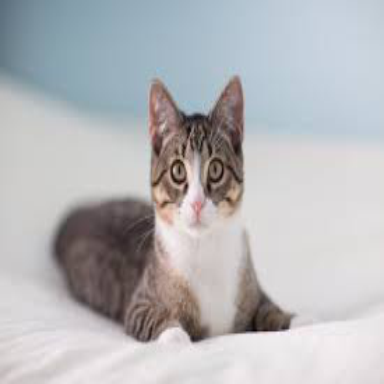

In [40]:

showarray( unnormalize(image, (0.5,0.5,0.5),(0.5,0.5,0.5)).permute(1, 2, 0).numpy() * 255.)